In [298]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [299]:
df = pd.read_csv('raw_data.csv')

In [300]:
df.head()

,Address,Prices,Area,toFace,type,certificate,width,length,floors
0,"Đường Hà Mục, Phường Hòa Thọ Đông, Quận Cẩm L...","5,15 tỷ",100 m2,Tây Nam,Nhà mặt tiền,---,5m,20m,4
1,"Đường Thi Sách, Phường Hòa Thuận Tây, Quận Hả...","4,1 tỷ",85 m2,_,Nhà mặt tiền,---,---,---,1
2,"Đường Ông Ích Khiêm, Phường Tam Thuận, Quận T...",11 tỷ,67 m2,Tây,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,"3,8m",---,3
3,"Đường Núi Thành, Phường Hòa Cường Bắc, Quận H...","17,5 tỷ",137 m2,Tây,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,"7,3m",---,3
4,"Đường Trương Văn Hiến, Phường Khuê Mỹ, Quận N...",7 tỷ,90 m2,Đông Nam,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,5m,18m,4


In [301]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14941 entries, 0 to 14940
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Address      14941 non-null  object
 1   Prices       14941 non-null  object
 2   Area         14941 non-null  object
 3   toFace       14941 non-null  object
 4   type         14941 non-null  object
 5   certificate  14941 non-null  object
 6   width        14941 non-null  object
 7   length       14941 non-null  object
 8   floors       14941 non-null  object
dtypes: object(9)
memory usage: 1.0+ MB


## Clean Data

### Prices

- Loại bỏ chữ tỷ trong cột prices
- Thay thế dấu ',' trong cột Prices thành dấu '.'
- Những cột nào định dạng sai không phải là số thì chuyển thành NaN

In [302]:
df['Prices'] = df['Prices'].apply(lambda x: x.strip(' tỷ ').replace(' ', ''))
df['Prices'] = df['Prices'].apply(lambda x: x.replace(',', '.'))
df.loc[:,'Prices'] = pd.to_numeric(df['Prices'], errors='coerce')

In [303]:
df.head()

,Address,Prices,Area,toFace,type,certificate,width,length,floors
0,"Đường Hà Mục, Phường Hòa Thọ Đông, Quận Cẩm L...",5.15,100 m2,Tây Nam,Nhà mặt tiền,---,5m,20m,4
1,"Đường Thi Sách, Phường Hòa Thuận Tây, Quận Hả...",4.1,85 m2,_,Nhà mặt tiền,---,---,---,1
2,"Đường Ông Ích Khiêm, Phường Tam Thuận, Quận T...",11.0,67 m2,Tây,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,"3,8m",---,3
3,"Đường Núi Thành, Phường Hòa Cường Bắc, Quận H...",17.5,137 m2,Tây,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,"7,3m",---,3
4,"Đường Trương Văn Hiến, Phường Khuê Mỹ, Quận N...",7.0,90 m2,Đông Nam,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,5m,18m,4


### Area

- Xóa 'm2'
- Những biến Area nào không phải định dạng là số thì chuyển vè NaN

In [304]:
df['Area'] = df['Area'].apply(lambda x: x.strip(' m2 ').replace(' ', '').replace('KXĐ',''))
df.loc[:,'Area'] = pd.to_numeric(df['Area'], errors='coerce')

Những giá trị area nào bằng 0 thì chuyển về NaN

In [305]:
df.loc[df.Area==0,'Area']=np.nan

In [306]:
df.head()

,Address,Prices,Area,toFace,type,certificate,width,length,floors
0,"Đường Hà Mục, Phường Hòa Thọ Đông, Quận Cẩm L...",5.15,100.0,Tây Nam,Nhà mặt tiền,---,5m,20m,4
1,"Đường Thi Sách, Phường Hòa Thuận Tây, Quận Hả...",4.1,85.0,_,Nhà mặt tiền,---,---,---,1
2,"Đường Ông Ích Khiêm, Phường Tam Thuận, Quận T...",11.0,67.0,Tây,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,"3,8m",---,3
3,"Đường Núi Thành, Phường Hòa Cường Bắc, Quận H...",17.5,137.0,Tây,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,"7,3m",---,3
4,"Đường Trương Văn Hiến, Phường Khuê Mỹ, Quận N...",7.0,90.0,Đông Nam,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,5m,18m,4


### toFace

In [307]:
df['toFace'].unique()

array(['Tây Nam', '_', 'Tây', 'Đông Nam', 'Đông', 'Tây Bắc', 'Bắc',
       'Đông Bắc', 'Nam'], dtype=object)

- Chuyển '_' về là 'Không'

In [308]:
df['toFace']=df['toFace'].apply(lambda x : x.replace('_', 'Không'))

In [309]:
df.head()

,Address,Prices,Area,toFace,type,certificate,width,length,floors
0,"Đường Hà Mục, Phường Hòa Thọ Đông, Quận Cẩm L...",5.15,100.0,Tây Nam,Nhà mặt tiền,---,5m,20m,4
1,"Đường Thi Sách, Phường Hòa Thuận Tây, Quận Hả...",4.1,85.0,Không,Nhà mặt tiền,---,---,---,1
2,"Đường Ông Ích Khiêm, Phường Tam Thuận, Quận T...",11.0,67.0,Tây,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,"3,8m",---,3
3,"Đường Núi Thành, Phường Hòa Cường Bắc, Quận H...",17.5,137.0,Tây,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,"7,3m",---,3
4,"Đường Trương Văn Hiến, Phường Khuê Mỹ, Quận N...",7.0,90.0,Đông Nam,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,5m,18m,4


### Type

In [310]:
df['type'].unique()

array(['Nhà mặt tiền', 'Nhà trong hẻm'], dtype=object)

### Certificate

Các giá trị của biến Certificate

In [311]:
df['certificate'].unique()

array(['---', 'Sổ hồng/ Sổ đỏ', 'Giấy tờ hợp lệ'], dtype=object)

Thay đổi giá trị '---' thành 'Không có'

Thay đổi giá trị 'Giấy tờ hợp lệ' thành 'Sổ hồng/ Sổ đỏ'

In [312]:
df["certificate"] = df["certificate"].apply(lambda x: 'Không có' if x == "---" else 'Giấy tờ hợp lệ')

In [313]:
df.head()

,Address,Prices,Area,toFace,type,certificate,width,length,floors
0,"Đường Hà Mục, Phường Hòa Thọ Đông, Quận Cẩm L...",5.15,100.0,Tây Nam,Nhà mặt tiền,Không có,5m,20m,4
1,"Đường Thi Sách, Phường Hòa Thuận Tây, Quận Hả...",4.1,85.0,Không,Nhà mặt tiền,Không có,---,---,1
2,"Đường Ông Ích Khiêm, Phường Tam Thuận, Quận T...",11.0,67.0,Tây,Nhà mặt tiền,Giấy tờ hợp lệ,"3,8m",---,3
3,"Đường Núi Thành, Phường Hòa Cường Bắc, Quận H...",17.5,137.0,Tây,Nhà mặt tiền,Giấy tờ hợp lệ,"7,3m",---,3
4,"Đường Trương Văn Hiến, Phường Khuê Mỹ, Quận N...",7.0,90.0,Đông Nam,Nhà mặt tiền,Giấy tờ hợp lệ,5m,18m,4


### Width and Length

Loại bỏ các từ thừa

In [314]:
df['width'] = df['width'].apply(lambda x: x.strip(' m ').replace(' ', '').replace(',','.'))
df['width'] = df['width'].astype(str).apply(lambda x: re.sub(r'^\.', '', x)).apply(lambda x: re.sub(r'\D+', '.', x)).apply(lambda x: re.sub(r'\.$', '', x))

In [315]:
df['length'] = df['length'].apply(lambda x: x.strip(' m ').replace(' ', '').replace(',','.'))
df['length'] = df['length'].astype(str).apply(lambda x: re.sub(r'\.$', '', x)).apply(lambda x: re.sub(r'\.{2,}', '.', x))

Những giá trị không phải là số thì Chuyển thành NaN

In [316]:
df.loc[:,'width'] = pd.to_numeric(df['width'], errors='coerce')
df.loc[:,'length'] = pd.to_numeric(df['length'], errors='coerce')

Những giá trị length hoặc width nào bằng 0 thì chuyển thành NaN

In [317]:
df.loc[df.width==0,['width']]=np.nan
df.loc[df.length==0,['length']]=np.nan

In [318]:
df.head()

,Address,Prices,Area,toFace,type,certificate,width,length,floors
0,"Đường Hà Mục, Phường Hòa Thọ Đông, Quận Cẩm L...",5.15,100.0,Tây Nam,Nhà mặt tiền,Không có,5.0,20.0,4
1,"Đường Thi Sách, Phường Hòa Thuận Tây, Quận Hả...",4.1,85.0,Không,Nhà mặt tiền,Không có,NaN,NaN,1
2,"Đường Ông Ích Khiêm, Phường Tam Thuận, Quận T...",11.0,67.0,Tây,Nhà mặt tiền,Giấy tờ hợp lệ,3.8,NaN,3
3,"Đường Núi Thành, Phường Hòa Cường Bắc, Quận H...",17.5,137.0,Tây,Nhà mặt tiền,Giấy tờ hợp lệ,7.3,NaN,3
4,"Đường Trương Văn Hiến, Phường Khuê Mỹ, Quận N...",7.0,90.0,Đông Nam,Nhà mặt tiền,Giấy tờ hợp lệ,5.0,18.0,4


### Floors

Các giá trị của biến floors

In [319]:
df['floors'].unique()

array(['4', '1', '3', '2', '6', '---', '5', '8', '7', '10', '33', '9',
       '14', '11', '19', '34', '18', '123', '23', '15', '35', '25', '12',
       '17', '20', '28'], dtype=object)

Chuyển những giá trị '---' thành NaN

In [320]:
df.loc[:,'floors'] = pd.to_numeric(df['floors'], errors='coerce')

### Định dạng lại dữ liệu

In [321]:
df.head()

,Address,Prices,Area,toFace,type,certificate,width,length,floors
0,"Đường Hà Mục, Phường Hòa Thọ Đông, Quận Cẩm L...",5.15,100.0,Tây Nam,Nhà mặt tiền,Không có,5.0,20.0,4.0
1,"Đường Thi Sách, Phường Hòa Thuận Tây, Quận Hả...",4.1,85.0,Không,Nhà mặt tiền,Không có,NaN,NaN,1.0
2,"Đường Ông Ích Khiêm, Phường Tam Thuận, Quận T...",11.0,67.0,Tây,Nhà mặt tiền,Giấy tờ hợp lệ,3.8,NaN,3.0
3,"Đường Núi Thành, Phường Hòa Cường Bắc, Quận H...",17.5,137.0,Tây,Nhà mặt tiền,Giấy tờ hợp lệ,7.3,NaN,3.0
4,"Đường Trương Văn Hiến, Phường Khuê Mỹ, Quận N...",7.0,90.0,Đông Nam,Nhà mặt tiền,Giấy tờ hợp lệ,5.0,18.0,4.0


In [322]:
def convert(df, features,t):
    for feature in features:
        df[feature] = df[feature].astype(t)
features_int = ["floors"]
features_cat = ["type","certificate","toFace"]
features_float =["Prices","Area","width","length"]
convert(df,features_int,"Int64")
convert(df,features_cat,"category")
convert(df,features_float,"float64")

Sau khi định dạng 

In [323]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14941 entries, 0 to 14940
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Address      14941 non-null  object  
 1   Prices       14875 non-null  float64 
 2   Area         14791 non-null  float64 
 3   toFace       14941 non-null  category
 4   type         14941 non-null  category
 5   certificate  14941 non-null  category
 6   width        12876 non-null  float64 
 7   length       10830 non-null  float64 
 8   floors       14586 non-null  Int64   
dtypes: Int64(1), category(3), float64(4), object(1)
memory usage: 759.5+ KB


In [324]:
df.describe()

,Prices,Area,width,length,floors
count,14875.000000,14791.000000,12876.000000,10830.000000,14586.0
mean,8.378236,87.218493,5.711354,18.190815,2.744344
std,11.268677,63.940995,5.113937,27.314063,1.995086
min,1.000000,0.103000,2.000000,1.000000,1.0
25%,3.600000,60.000000,4.500000,14.000000,2.0
50%,5.250000,80.000000,5.000000,17.500000,3.0
75%,8.800000,100.000000,5.500000,20.000000,3.0
max,315.000000,950.000000,420.000000,2020.000000,123.0


## Create new Feature

Tách trường Address thành:
- Street (Đường)
- Ward (Phường-Xã)
- District (Quận - Huyện)
- City (Thành Phố)

In [325]:
# df[['Street','Ward','District','City','','','']] = df['Address'].str.split(', ', expand=True)
df['Street']=df['Address'].str.split(', ', expand=True)[0]
df['Ward']=df['Address'].str.split(', ', expand=True)[1]
df['District']=df['Address'].str.split(', ', expand=True)[2]

Loại bỏ các trường "City", "Address" và sắp xếp lại thứ tự các trường

In [326]:
df = df.drop(['Address'], axis=1)
df = df[['Street','Ward','District', 'Prices', 'Area', 'toFace', 'type', 'certificate', 'width', 'length', 'floors']]
df.head()

,Street,Ward,District,Prices,Area,toFace,type,certificate,width,length,floors
0,Đường Hà Mục,Phường Hòa Thọ Đông,Quận Cẩm Lệ,5.15,100.0,Tây Nam,Nhà mặt tiền,Không có,5.0,20.0,4
1,Đường Thi Sách,Phường Hòa Thuận Tây,Quận Hải Châu,4.10,85.0,Không,Nhà mặt tiền,Không có,NaN,NaN,1
2,Đường Ông Ích Khiêm,Phường Tam Thuận,Quận Thanh Khê,11.00,67.0,Tây,Nhà mặt tiền,Giấy tờ hợp lệ,3.8,NaN,3
3,Đường Núi Thành,Phường Hòa Cường Bắc,Quận Hải Châu,17.50,137.0,Tây,Nhà mặt tiền,Giấy tờ hợp lệ,7.3,NaN,3
4,Đường Trương Văn Hiến,Phường Khuê Mỹ,Quận Ngũ Hành Sơn,7.00,90.0,Đông Nam,Nhà mặt tiền,Giấy tờ hợp lệ,5.0,18.0,4


Loại bỏ những giá trị không phải là quận, huyện ở Đà Nẵng 
    
('Quận Cẩm Lệ', 'Quận Hải Châu', 'Quận Thanh Khê', 'Quận Ngũ Hành Sơn', 'Quận Sơn Trà', 'Quận Liên Chiểu', 'Huyện Hòa Vang') 

In [327]:
df['District']= df['District'].str.lower()
District = ['quận cẩm lệ', 'quận hải châu', 'quận thanh khê',
       'quận ngũ hành sơn', 'quận sơn trà', 'quận liên chiểu','huyện hòa vang']
df = df.loc[df['District'].isin(District)]
df.loc[:,'District'] = df['District'].str.replace("quận ","")
df.loc[:,'District'] = df['District'].str.replace("huyện ","")

In [328]:
df.loc[:,'Ward'] = df['Ward'].str.replace("Phường ","")
df.loc[:,'Street'] = df['Street'].str.replace("Đường ","")

In [329]:
df['District'].unique()

array(['cẩm lệ', 'hải châu', 'thanh khê', 'ngũ hành sơn', 'sơn trà',
       'liên chiểu', 'hòa vang'], dtype=object)

Thêm một trường Location theo Address của ngôi nhà

Sử dụng API của BingMap để lấy latitude, Longitude theo địa chỉ của ngôi nhà

In [330]:
import requests

# Địa chỉ cần tìm tọa độ
address = "Đường Huyền Trân Công Chúa, Ngũ Hành Sơn, Đà Nẵng, Việt Nam"

# Tạo URL request
url = "https://dev.virtualearth.net/REST/v1/Locations"

# Gửi yêu cầu HTTP
def getLocation(Address):
    params = {
        "q": Address,
        "key": "AuCD3WhuOOT5HhbRcvJAt1DyK293gMNSAfPSTcgaXGlrVlVTRpXs06BWdTexjaOA"
    }
    response = requests.get(url, params=params)
    data = response.json()
    # Kiểm tra xem có kết quả tọa độ hay không
    if "resourceSets" in data and len(data["resourceSets"]) > 0 and "resources" in data["resourceSets"][0] and len(data["resourceSets"][0]["resources"]) > 0:
        coordinates = data["resourceSets"][0]["resources"][0]["point"]["coordinates"]
        latitude = coordinates[0]
        longitude = coordinates[1]
        location = str(latitude)+","+str(longitude)
        return location
    else:
        return np.nan


In [331]:
# Address = df['Street']+', '+df['District']+', Đà Nẵng, Việt Nam'
# df['Location']=Address.apply(lambda x: getLocation(x))
# df.to_csv('clean_data.csv')

In [332]:
df = pd.read_csv('clean_data2.csv')

In [333]:
df.head()

,Street,Ward,District,Prices,Area,toFace,type,certificate,width,length,floors,Location
0,Hà Mục,Hòa Thọ Đông,cẩm lệ,5.15,100.0,Tây Nam,Nhà mặt tiền,Không có,5.0,20.0,4.0,"16.01918,108.19537"
1,Thi Sách,Hòa Thuận Tây,hải châu,4.10,85.0,Không,Nhà mặt tiền,Không có,NaN,NaN,1.0,"16.0546,108.20547"
2,Ông Ích Khiêm,Tam Thuận,thanh khê,11.00,67.0,Tây,Nhà mặt tiền,Giấy tờ hợp lệ,3.8,NaN,3.0,"16.06653,108.2142"
3,Núi Thành,Hòa Cường Bắc,hải châu,17.50,137.0,Tây,Nhà mặt tiền,Giấy tờ hợp lệ,7.3,NaN,3.0,"16.03194,108.22279"
4,Trương Văn Hiến,Khuê Mỹ,ngũ hành sơn,7.00,90.0,Đông Nam,Nhà mặt tiền,Giấy tờ hợp lệ,5.0,18.0,4.0,"16.01947,108.25592"


Tạo thêm 2 trường 
- DistanceToCenter (Khoảng cách đến trung tâm thành phố)
- DistanceToBeach (Khoảng cách đến biển)

In [334]:
tttp = (16.061203,108.226744)
beach = (16.0704,108.2461)
airport = (16.043889 ,108.199444)
def distance(l1,l2):
    # return (np.sqrt((l1[0]-l2[0])**2+(l1[1]-l2[1])**2)*1000)
    lat1_rad = np.radians(l1[0])
    lon1_rad = np.radians(l1[1])
    lat2_rad = np.radians(l2[0])
    lon2_rad = np.radians(l2[1])

    # Tính khoảng cách
    delta_lat = lat2_rad - lat1_rad
    delta_lon = lon2_rad - lon1_rad
    a = np.sin(delta_lat / 2) ** 2 + np.cos(lat1_rad) * np.cos(lat2_rad) * np.sin(delta_lon / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    radius = 6371  # Bán kính trái đất (đơn vị: kilômét)
    distance = radius * c
    return distance

df['Latitude'] = (df['Location'].str.split(',',expand=True)[0])
df['Longitude'] = df['Location'].str.split(',',expand=True)[1]

In [335]:
df['Latitude']=df['Latitude'].astype('float32')
df['Longitude']=df['Longitude'].astype('float32')
df['DistanceToCenter'] = distance(tttp,(np.float64(df['Latitude']),np.float64(df['Longitude'])))
df['DistanceToBeach']= distance(beach,(np.float64(df['Latitude']),np.float64(df['Longitude'])))

In [336]:
df.head()

,Street,Ward,District,Prices,Area,toFace,type,certificate,width,length,floors,Location,Latitude,Longitude,DistanceToCenter,DistanceToBeach
0,Hà Mục,Hòa Thọ Đông,cẩm lệ,5.15,100.0,Tây Nam,Nhà mặt tiền,Không có,5.0,20.0,4.0,"16.01918,108.19537",16.01918,108.195374,5.750916,7.862720
1,Thi Sách,Hòa Thuận Tây,hải châu,4.10,85.0,Không,Nhà mặt tiền,Không có,NaN,NaN,1.0,"16.0546,108.20547",16.05460,108.205467,2.389182,4.683770
2,Ông Ích Khiêm,Tam Thuận,thanh khê,11.00,67.0,Tây,Nhà mặt tiền,Giấy tờ hợp lệ,3.8,NaN,3.0,"16.06653,108.2142",16.06653,108.214203,1.465144,3.435286
3,Núi Thành,Hòa Cường Bắc,hải châu,17.50,137.0,Tây,Nhà mặt tiền,Giấy tờ hợp lệ,7.3,NaN,3.0,"16.03194,108.22279",16.03194,108.222794,3.281117,4.948860
4,Trương Văn Hiến,Khuê Mỹ,ngũ hành sơn,7.00,90.0,Đông Nam,Nhà mặt tiền,Giấy tờ hợp lệ,5.0,18.0,4.0,"16.01947,108.25592",16.01947,108.255920,5.590678,5.759550


## Mising Data

Thay thế giá trị trống của trường Prices, Area, floors bằng mean

In [337]:
df['Prices']=df['Prices'].fillna(df['Prices'].mean())
df['Area']=df['Area'].fillna(df['Area'].mean())
df['floors']=df['floors'].fillna(int(df['floors'].mean()))


Trường Width và Length

- Nếu giá trị width khác rỗng và length là rỗng thì: length = area/width
- Ngược lại thì: width = area/length
- Cả hai là rỗng thì length = width = sqrt(area)

In [338]:
df.loc[(df.width.isnull()) & (df.length.notnull()),['width']] = (df['Area'])/(df['length'])
df.loc[(df.width.notnull()) & (df.length.isnull()),['length']] = (df['Area'])/(df['width'])
df.loc[(df.width.isnull()) & (df.length.isnull()),['width','length']] = np.sqrt(df['Area'])

## Outlier

In [339]:
data = df.copy()

In [340]:
uppper_boundary=df['Prices'].mean() + 3* df['Prices'].std()
lower_boundary=df['Prices'].mean() - 3* df['Prices'].std()
print("Biên trên:",uppper_boundary)

Biên trên: 42.29344192029161


In [341]:
df.loc[(df.Prices>uppper_boundary),'Prices'] = uppper_boundary

<Axes: xlabel='Prices', ylabel='Count'>

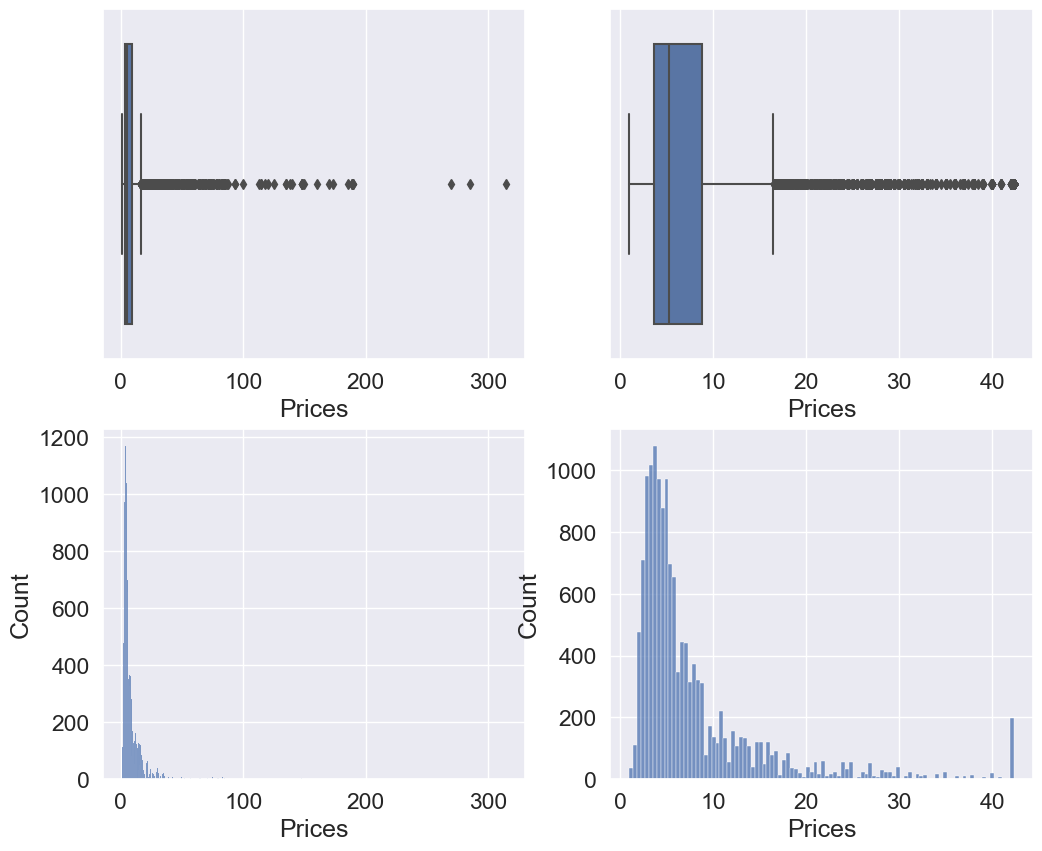

In [342]:
fig, axes = plt.subplots(ncols=2,nrows=2, figsize=(12,10))
sns.boxplot(data=data,x='Prices',ax=axes[0][0])
sns.boxplot(data=df,x='Prices',ax=axes[0][1])
sns.histplot(data=data,x='Prices',ax=axes[1][0])
sns.histplot(data=df,x='Prices',ax=axes[1][1])

In [343]:
uppper_boundary=df['Area'].mean() + 3* df['Area'].std()
print("Biên trên:",uppper_boundary)

Biên trên: 278.4249120490516


In [344]:
df.loc[(df.Area>uppper_boundary),'Area'] = uppper_boundary

<Axes: xlabel='Area', ylabel='Count'>

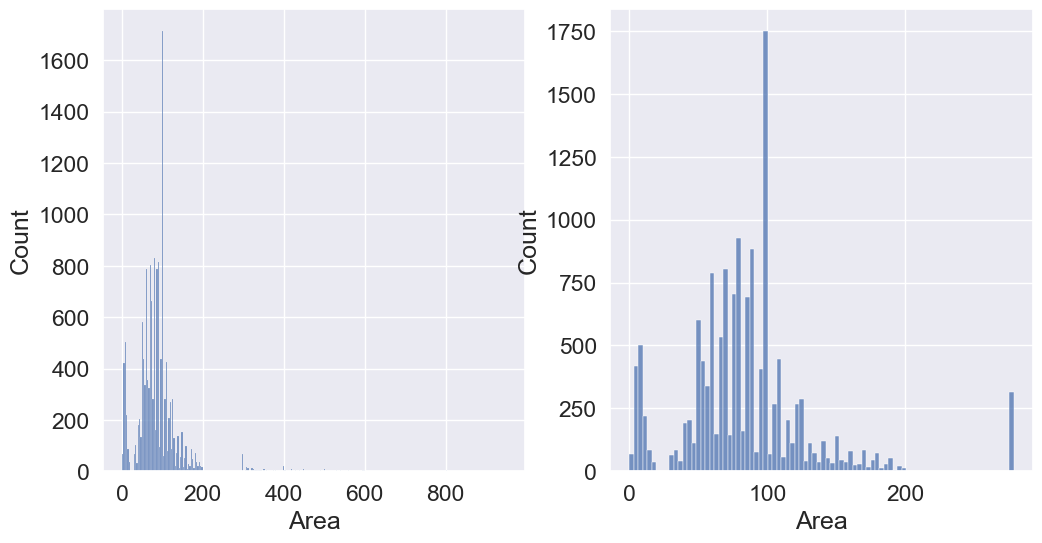

In [345]:
fig, axes = plt.subplots(ncols=2, figsize=(12,6))
sns.histplot(data=data,x='Area',ax=axes[0])
sns.histplot(data=df,x='Area',ax=axes[1])

In [346]:
uppper_boundary=df['floors'].mean() + 3* df['floors'].std()
print("Biên trên:",uppper_boundary)

Biên trên: 8.636924673324726


In [347]:
df.loc[(df.floors>uppper_boundary),'floors']=int(uppper_boundary)

<Axes: xlabel='floors'>

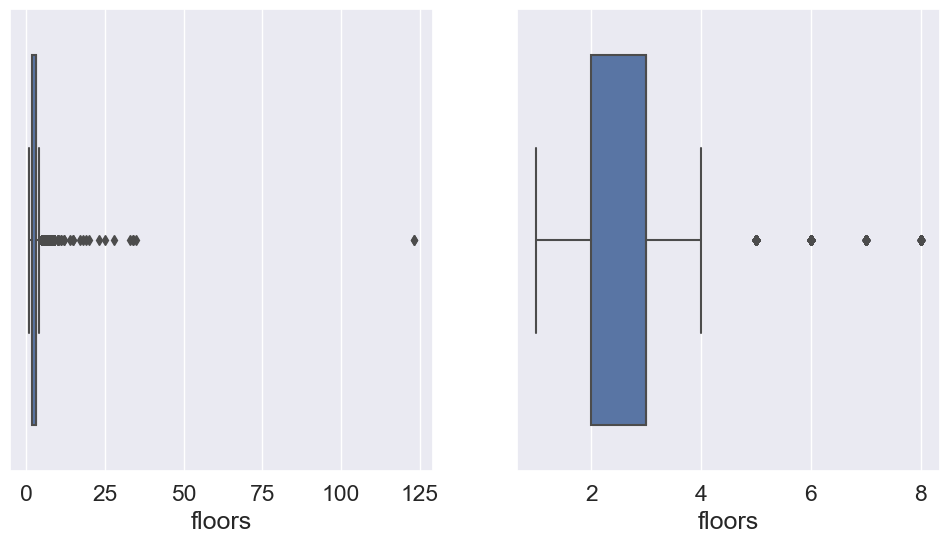

In [348]:
fig, axes = plt.subplots(ncols=2, figsize=(12,6))
sns.boxplot(data=data,x='floors',ax=axes[0])
sns.boxplot(data=df,x='floors',ax=axes[1])

In [349]:
uppper_boundary=df['width'].mean() + 3* df['width'].std()
print("Biên trên:",uppper_boundary)
df.loc[(df.width>uppper_boundary),'width'] = uppper_boundary

Biên trên: 21.28694581336921


<Axes: xlabel='width'>

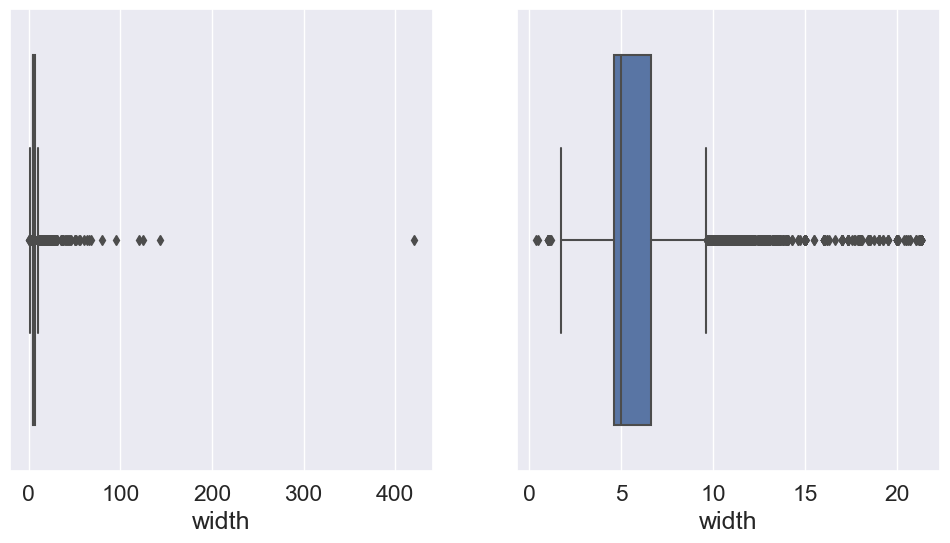

In [350]:
fig, axes = plt.subplots(ncols=2, figsize=(12,6))
sns.boxplot(data=data,x='width',ax=axes[0])
sns.boxplot(data=df,x='width',ax=axes[1])

In [351]:
uppper_boundary=df['length'].mean() + 3* df['length'].std()
print("Biên trên:",uppper_boundary)
df.loc[(df.length>uppper_boundary),'length'] = uppper_boundary

Biên trên: 88.45288630811224


<Axes: xlabel='length'>

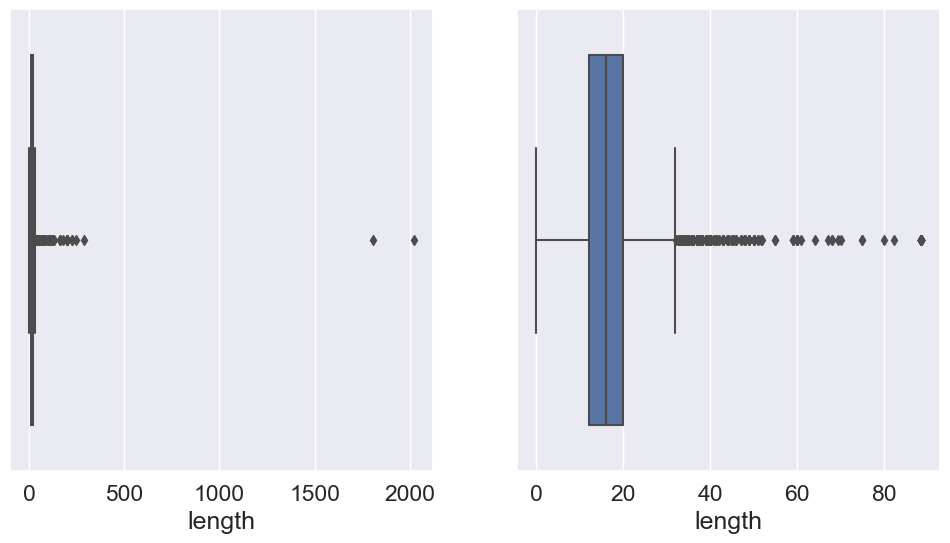

In [352]:
fig, axes = plt.subplots(ncols=2, figsize=(12,6))
sns.boxplot(data=data,x='length',ax=axes[0])
sns.boxplot(data=df,x='length',ax=axes[1])

## Feature Transformation

In [353]:
data=df.copy()

In [354]:
import scipy.stats as stat
def plot_data(feature):
    plt.figure(figsize=(10,6))

    plt.subplot(2,2,1)
    stat.probplot(data[feature],dist='norm',plot=plt)# prob plot

    plt.subplot(2,2,2)
    stat.probplot(df[feature],dist='norm',plot=plt)# prob plot

    plt.subplot(2,2,3)
    sns.histplot(data[feature])

    plt.subplot(2,2,4)
    sns.histplot(df[feature])
    
    plt.show()

Chuẩn hóa các trường Area, width, length với chuẩn hóa Normalizer

In [355]:
from sklearn.preprocessing import MaxAbsScaler,Normalizer,StandardScaler,RobustScaler,PowerTransformer
scaler = StandardScaler()
temp = df[['Area','width','length']]
df.loc[:,['Area','width','length']] = (scaler.fit_transform(temp))

# temp

Chuẩn hóa trường Prices với phương pháp chuẩn hóa PowerTransformer

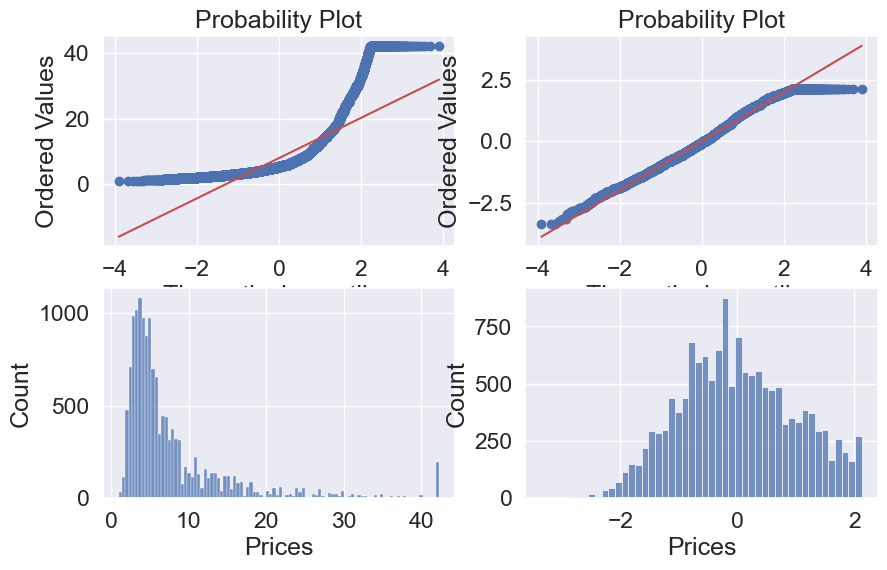

In [356]:

df['Prices'] = PowerTransformer().fit_transform(df[['Prices']])

plot_data('Prices')

<Axes: xlabel='Area', ylabel='Prices'>

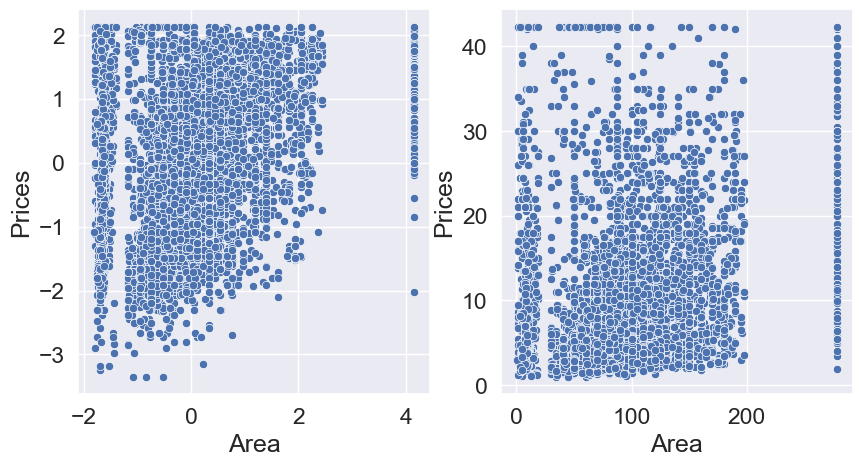

In [357]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
sns.scatterplot(data=df,x='Area',y='Prices',ax=axes[0])
sns.scatterplot(data=data,x='Area',y='Prices',ax=axes[1])

<Axes: xlabel='width', ylabel='Prices'>

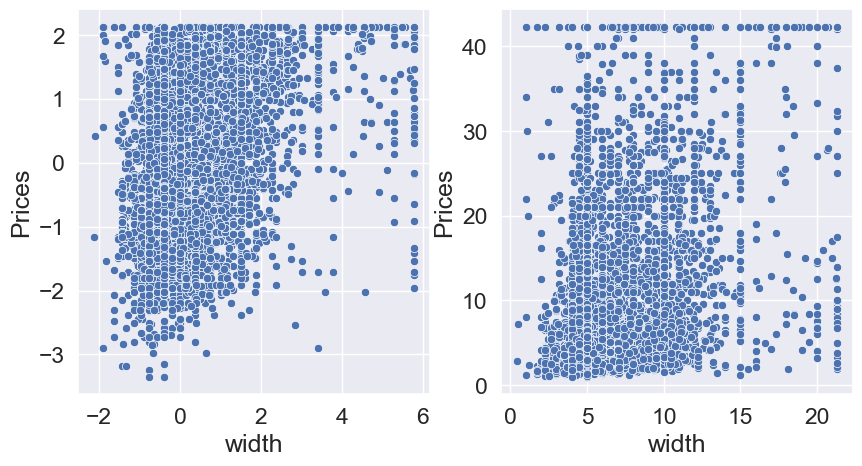

In [358]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
sns.scatterplot(data=df,x='width',y='Prices',ax=axes[0])
sns.scatterplot(data=data,x='width',y='Prices',ax=axes[1])

<Axes: xlabel='length', ylabel='Prices'>

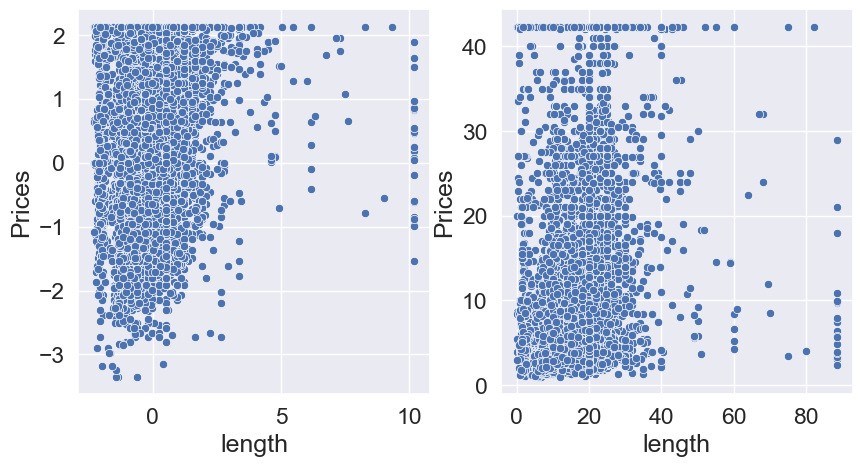

In [359]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
sns.scatterplot(data=df,x='length',y='Prices',ax=axes[0])
sns.scatterplot(data=data,x='length',y='Prices',ax=axes[1])

In [360]:
df.head()

,Street,Ward,District,Prices,Area,toFace,type,certificate,width,length,floors,Location,Latitude,Longitude,DistanceToCenter,DistanceToBeach
0,Hà Mục,Hòa Thọ Đông,cẩm lệ,-0.109935,0.331876,Tây Nam,Nhà mặt tiền,Không có,-0.384833,0.532496,4.0,"16.01918,108.19537",16.01918,108.195374,5.750916,7.862720
1,Thi Sách,Hòa Thuận Tây,hải châu,-0.504485,0.010225,Không,Nhà mặt tiền,Không có,1.214177,-0.987467,1.0,"16.0546,108.20547",16.05460,108.205467,2.389182,4.683770
2,Ông Ích Khiêm,Tam Thuận,thanh khê,0.974593,-0.375756,Tây,Nhà mặt tiền,Giấy tờ hợp lệ,-0.839577,0.198567,3.0,"16.06653,108.2142",16.06653,108.214203,1.465144,3.435286
3,Núi Thành,Hòa Cường Bắc,hải châu,1.469697,1.125282,Tây,Nhà mặt tiền,Giấy tờ hợp lệ,0.486759,0.358670,3.0,"16.03194,108.22279",16.03194,108.222794,3.281117,4.948860
4,Trương Văn Hiến,Khuê Mỹ,ngũ hành sơn,0.371615,0.117442,Đông Nam,Nhà mặt tiền,Giấy tờ hợp lệ,-0.384833,0.250511,4.0,"16.01947,108.25592",16.01947,108.255920,5.590678,5.759550


## Feature Selection (QKhang)

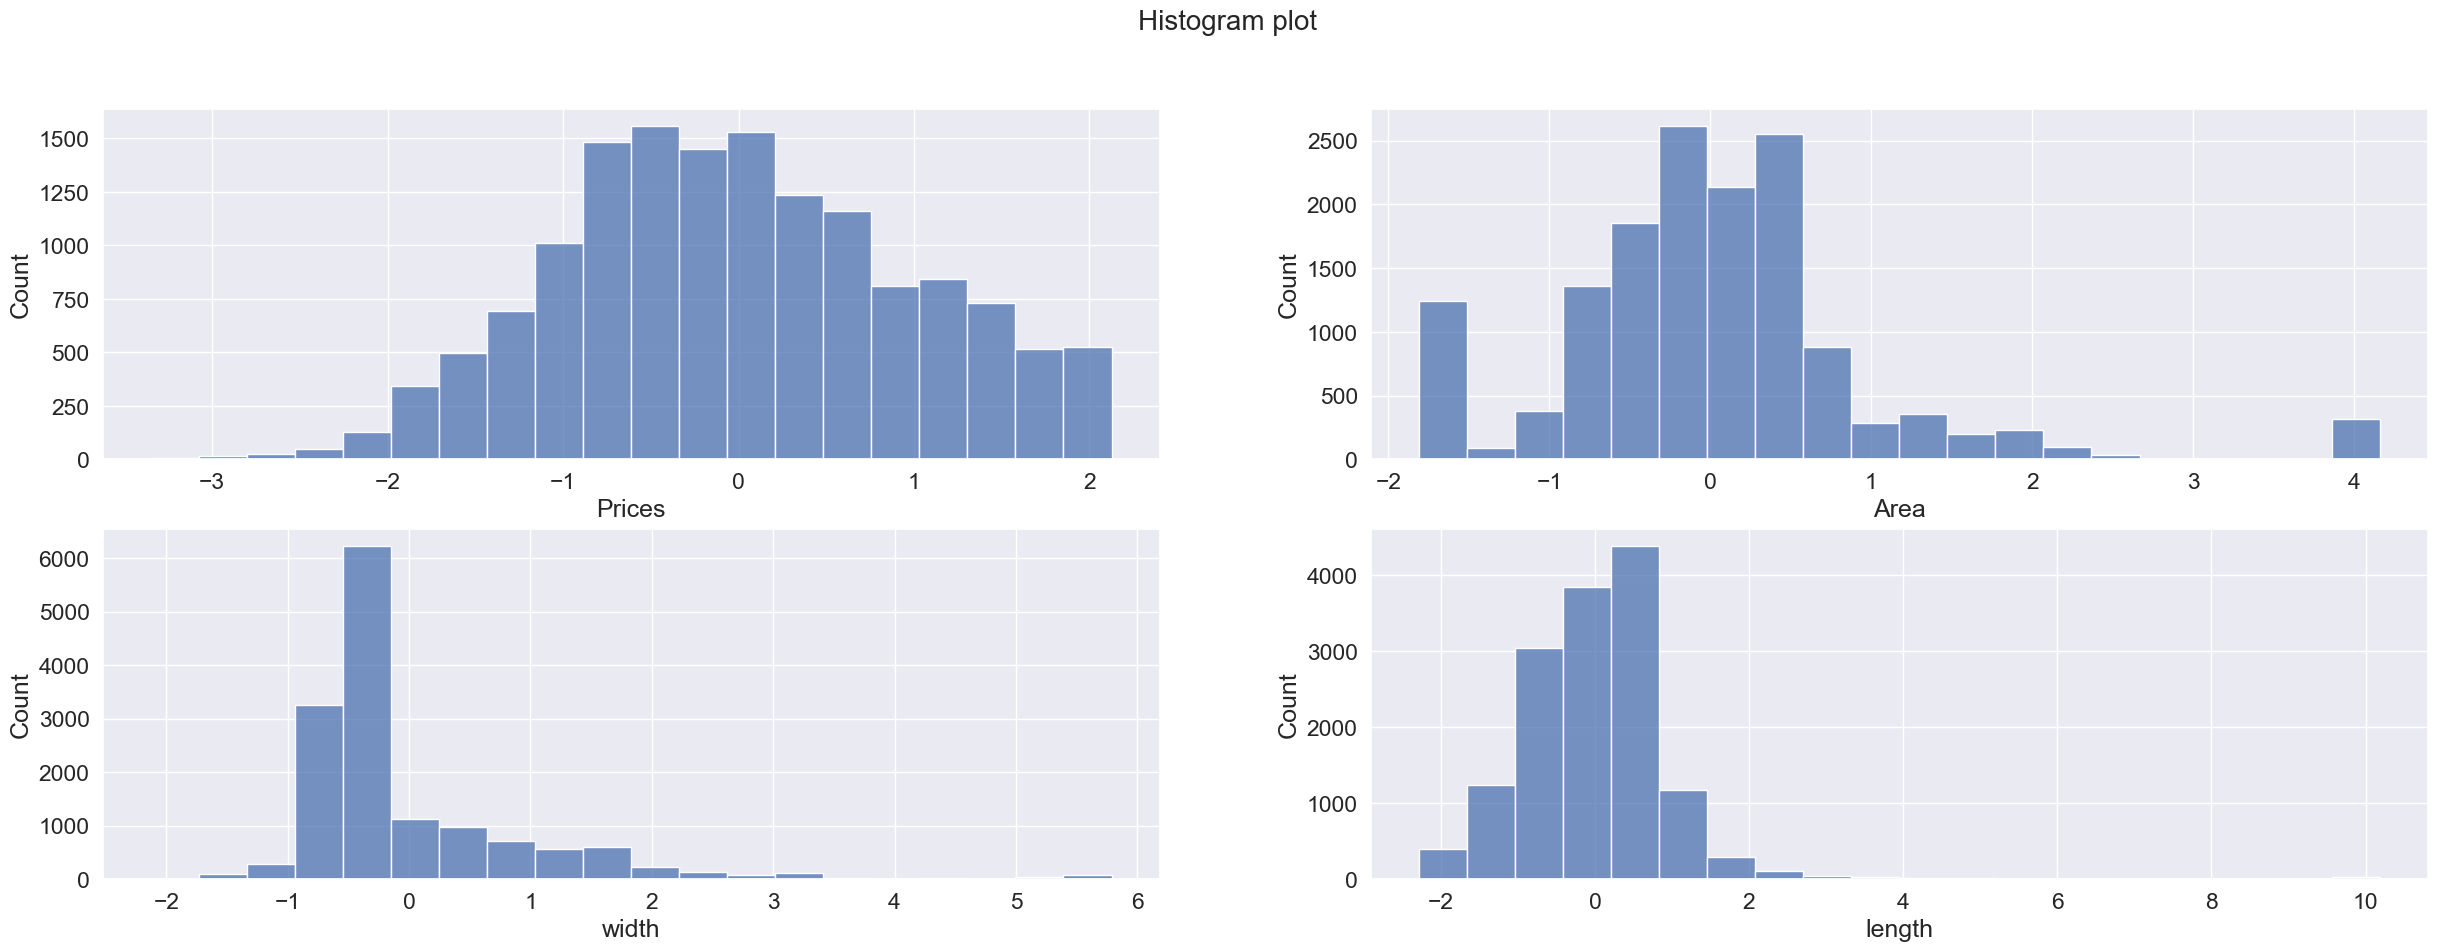

In [361]:
NummericData = ['Prices','Area','width','length']
fig = plt.figure(figsize = (30,10))
fig.suptitle("Histogram plot", fontsize = 20)
for i in enumerate(NummericData):
    axe = fig.add_subplot(2,2, i[0]+1)
    sns.histplot(x=df[i[1]], ax = axe, bins=20)

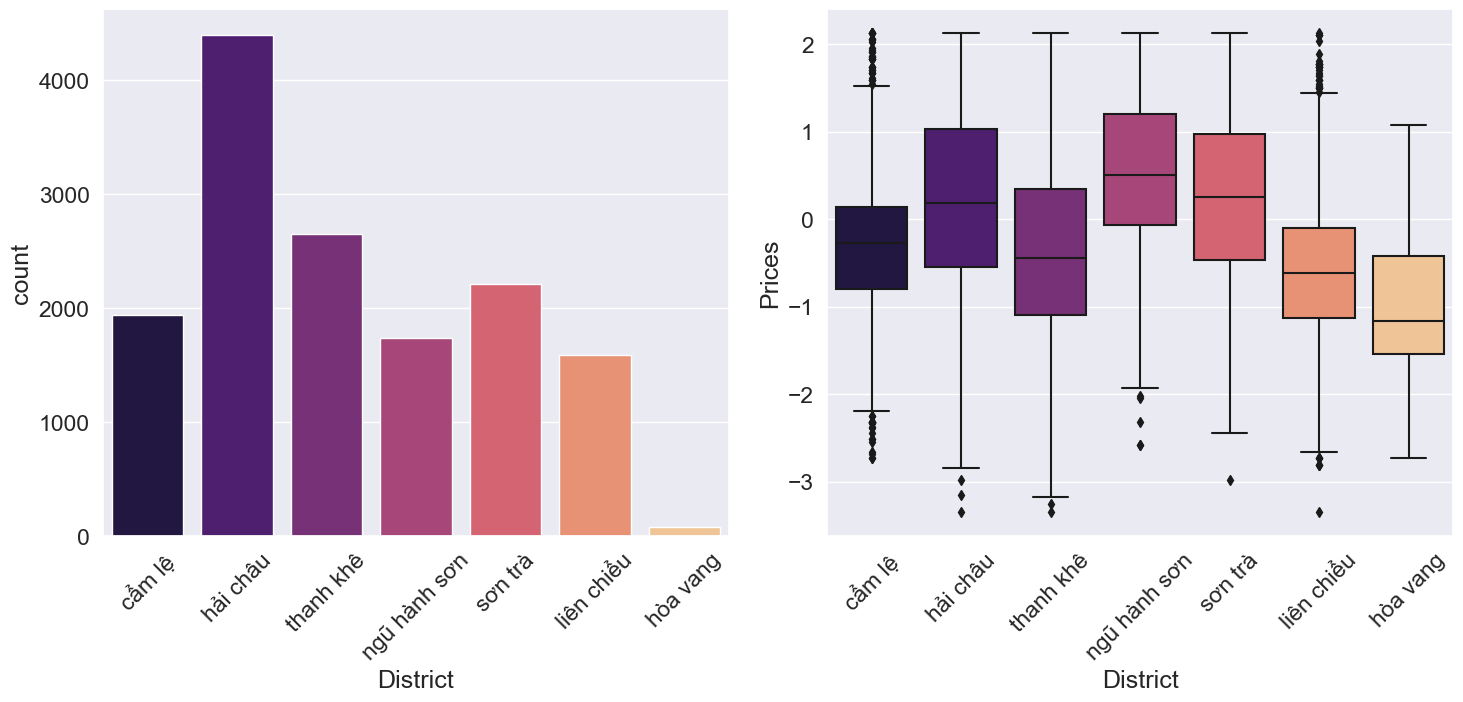

In [362]:
def plot_count(x,fig):
    plt.subplot(3,2,fig)
    ax1 = sns.countplot(x=df[x],palette=("magma"))
    ax1.set_xticklabels(df[x].unique(), rotation = 45)
    plt.subplot(3,2,(fig+1))
    ax2 = sns.boxplot(x=df[x], y=df.Prices, palette=("magma"))
    ax2.set_xticklabels(df[x].unique(), rotation = 45)
    
plt.figure(figsize=(15,20))
plot_count('District', 1)
plt.tight_layout()

Nhận xét:
- Nhận thấy rằng Số lượng nhà ở quận Hải Châu là nhiều nhất

- Giá nhà ở quận Ngũ Hành Sơn là cao nhất

Vì vậy giá nhà và vị trí quận huyện tương quan với nhau

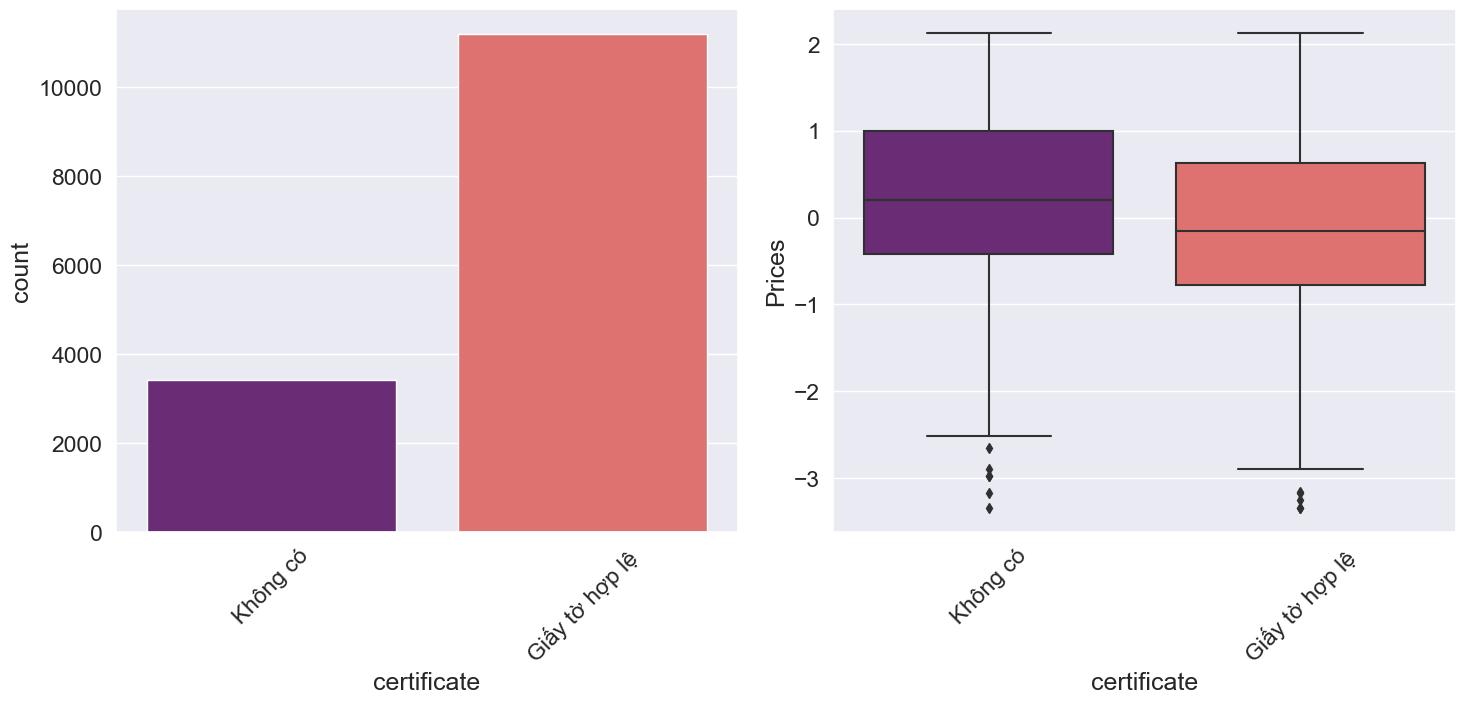

In [363]:
plt.figure(figsize=(15,20))
plot_count('certificate', 1)
plt.tight_layout()

Nhận xét:
- Nhà có giấy tờ đầy đủ thì có giá bán cao hơn nhà không có giấy tờ

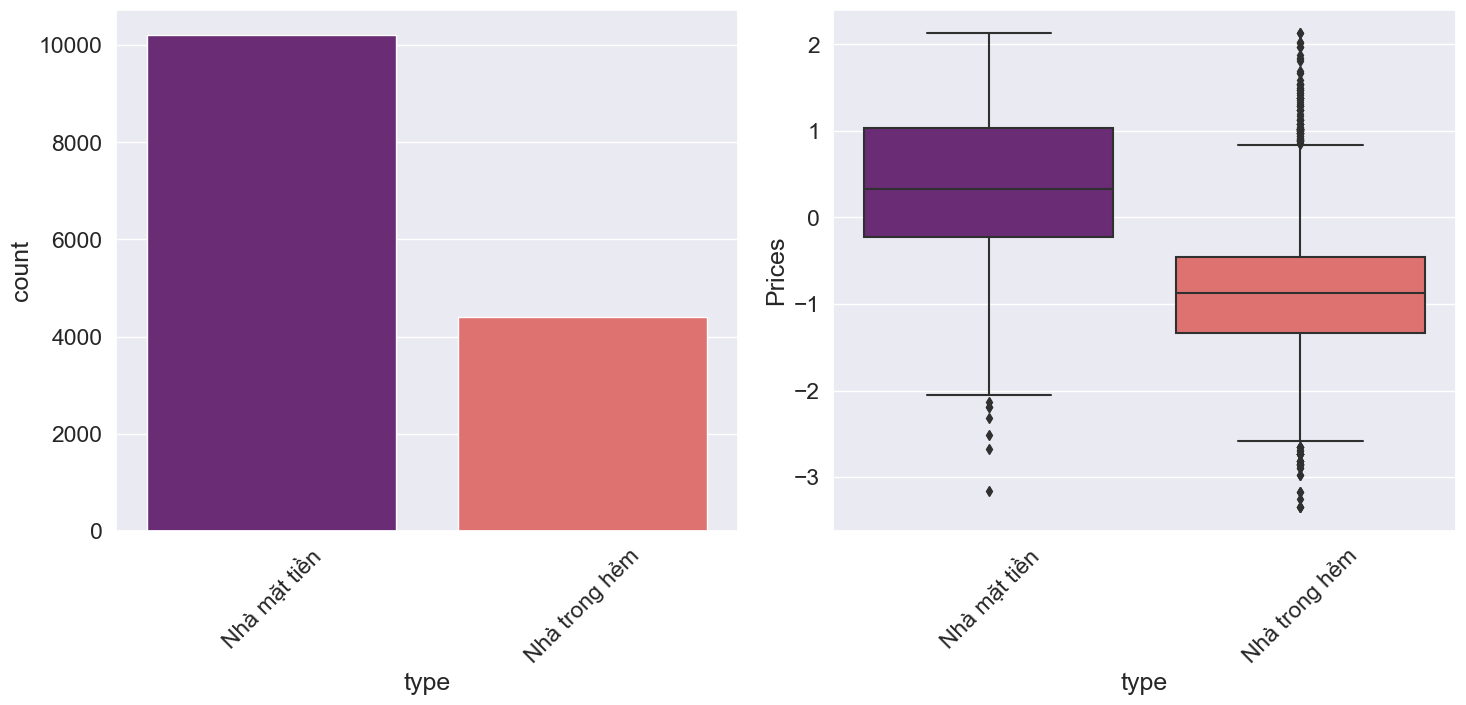

In [364]:
plt.figure(figsize=(15,20))
plot_count('type', 1)
plt.tight_layout()

Nhận xét:

- Những nhà ở mặt tiền thì có giá cao bơn những nhà ở trong hẻm

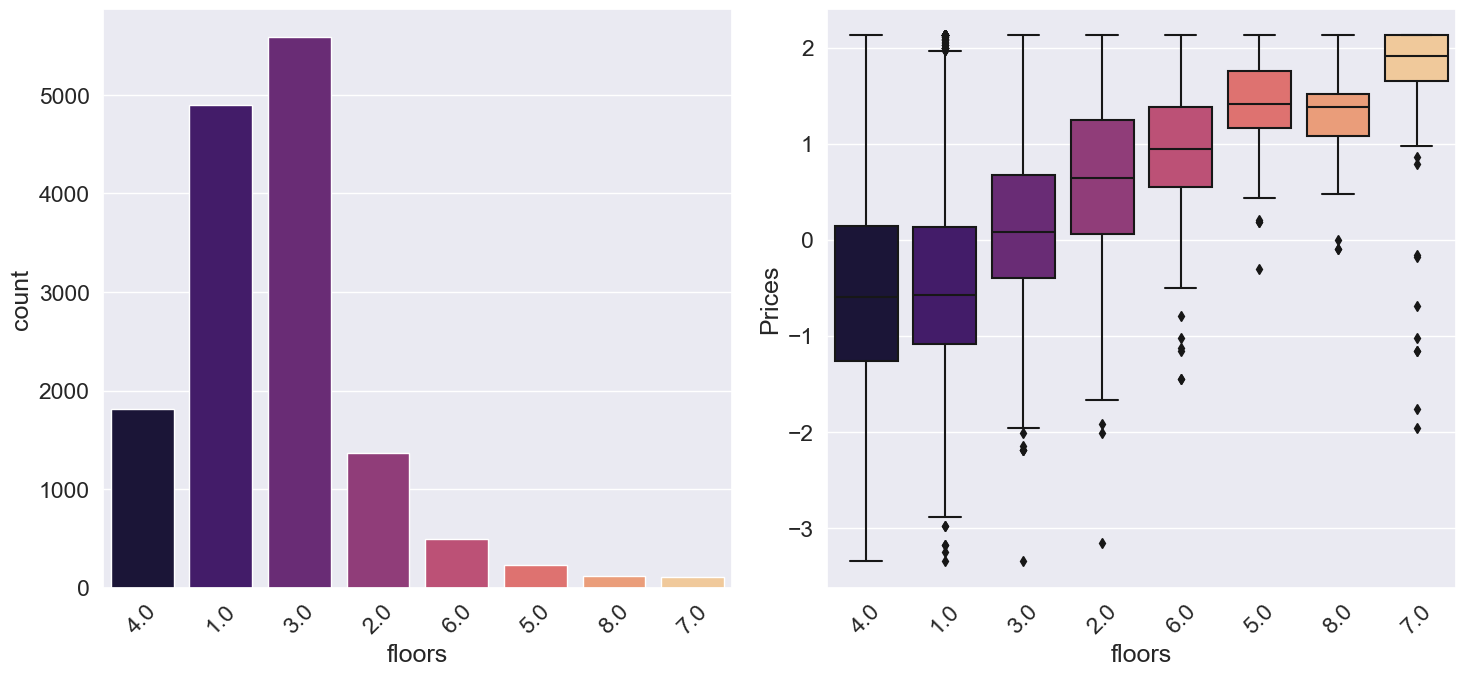

In [365]:
plt.figure(figsize=(15,20))
plot_count('floors', 1)
plt.tight_layout()

Nhận xét:
- Nhà 1 và 2 tầng được bán nhiều nhất
- Nhà cành nhiều tầng thì giá càng cao

floors tương quan với Prices

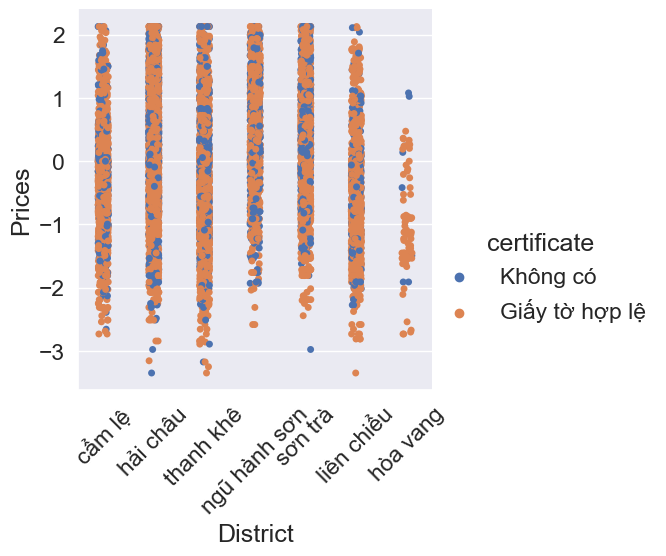

In [366]:
axis = sns.catplot(data= df,x='District',y='Prices',hue='certificate')
axis.set_xticklabels(df['District'].unique(), rotation = 45)

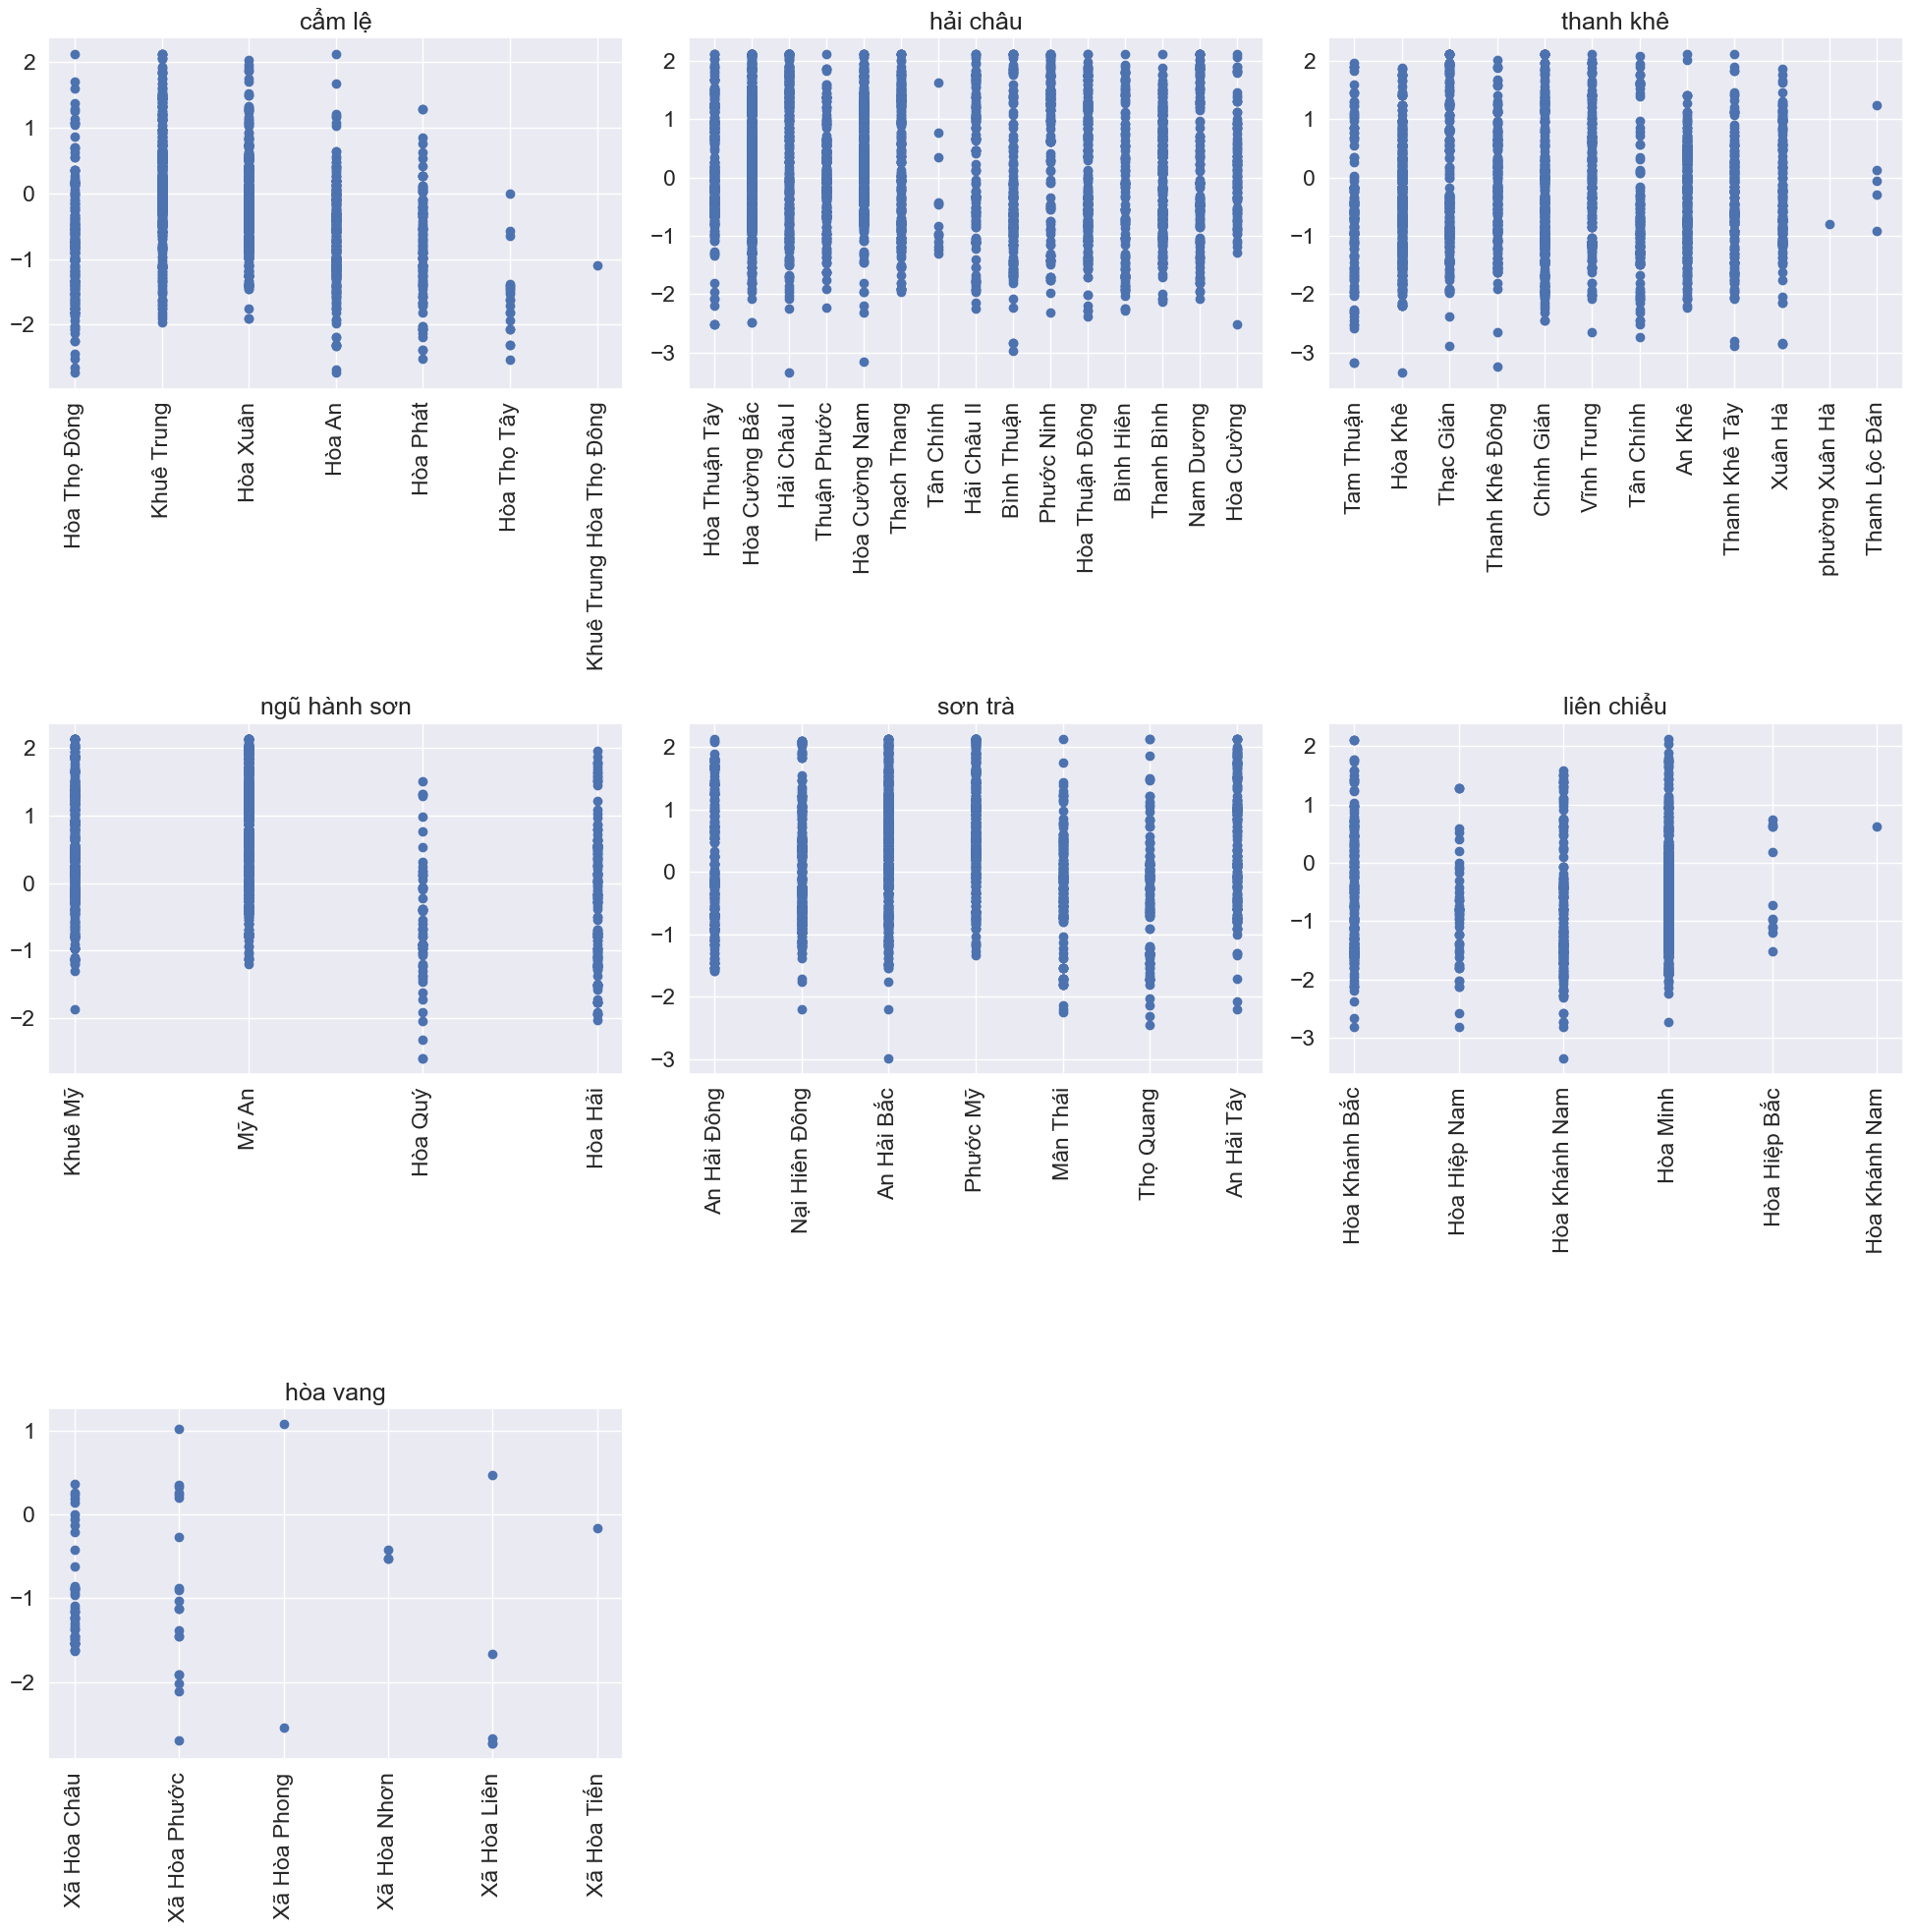

In [367]:

count =1
plt.figure(figsize=(20,20))
for i in df['District'].unique():
    PricesByWard = df[df.District == i]

    sns.set(font_scale = 1.5)
    plt.subplot(3,3,count)
    plt.scatter(PricesByWard['Ward'],PricesByWard['Prices'])
    plt.title(i)

    plt.xticks(rotation=90)
    count+=1


plt.tight_layout()


Nhận xét:
- Nhà ở các phường khác nhau thì có giá khác nhau

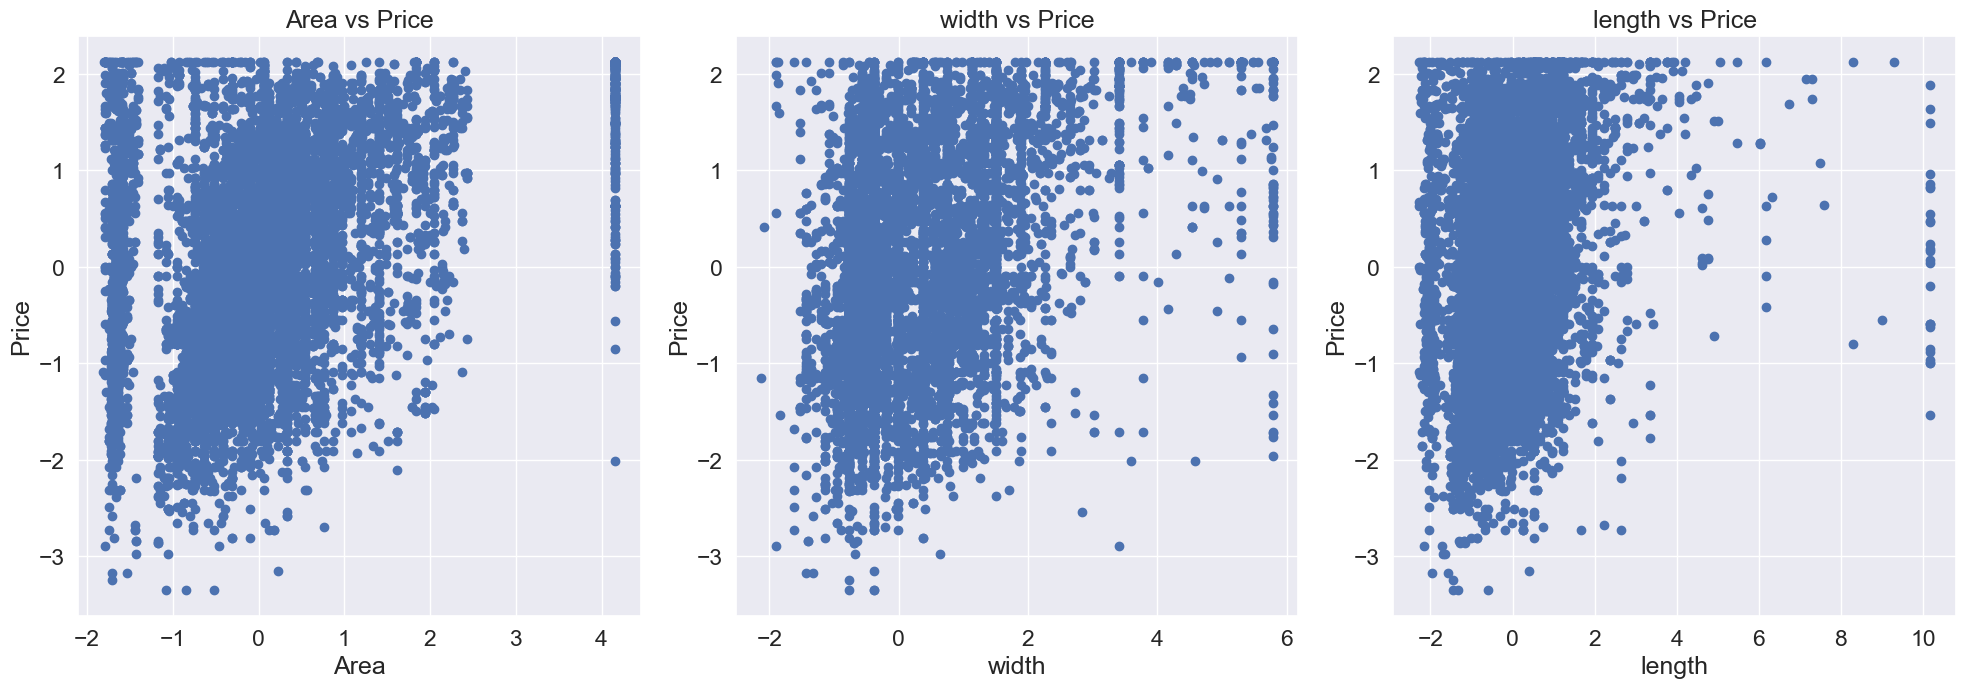

In [368]:
def scatter(x,fig):
    sns.set(font_scale = 1.5)
    plt.subplot(3,3,fig)
    plt.scatter(df[x],df['Prices'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(20,20))

scatter('Area', 1)
scatter('width', 2)
scatter('length', 3)

plt.tight_layout()

<Axes: >

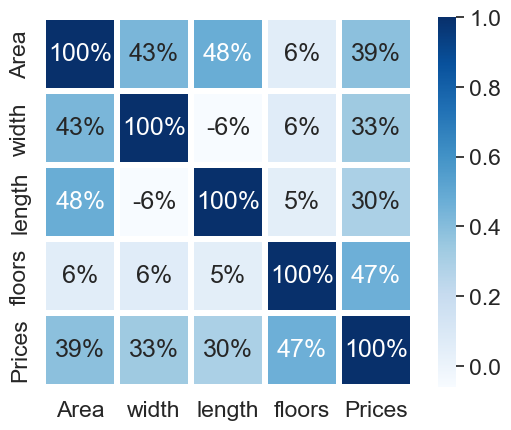

In [369]:
cols_pv = ['Area','width','length','floors','Prices']

sns.heatmap(df[cols_pv].corr(),annot=True, linewidths=3, square=True, cmap='Blues', fmt=".0%")


<h2>Kết Luận</h2>

Các biến ảnh hưởng đến Prices:

- Are
- length
- width
- District
- certificate
- floors


## Lable Encoding

In [370]:
df['District'].unique()

array(['cẩm lệ', 'hải châu', 'thanh khê', 'ngũ hành sơn', 'sơn trà',
       'liên chiểu', 'hòa vang'], dtype=object)

Chuyển dữ liệu trường District về dạnh số

- cẩm lệ -> 0
- hải châu -> 1
- thanh khê -> 2
- ngũ hành sơn -> 3
- sơn trà -> 4
- liên chiểu -> 5
- hòa vang -> 6

In [371]:
from sklearn.preprocessing import LabelEncoder

# Khởi tạo LabelEncoder
le = LabelEncoder()

df['District'] = le.fit_transform(df['District'])


In [372]:
type_map = {'Nhà trong hẻm':0,'Nhà mặt tiền':1}
df['type']=le.fit_transform(df['type'].map(type_map))

In [373]:
df['certificate']= le.fit_transform(df['certificate'])

In [374]:
df.head(5)

,Street,Ward,District,Prices,Area,toFace,type,certificate,width,length,floors,Location,Latitude,Longitude,DistanceToCenter,DistanceToBeach
0,Hà Mục,Hòa Thọ Đông,0,-0.109935,0.331876,Tây Nam,1,1,-0.384833,0.532496,4.0,"16.01918,108.19537",16.01918,108.195374,5.750916,7.862720
1,Thi Sách,Hòa Thuận Tây,2,-0.504485,0.010225,Không,1,1,1.214177,-0.987467,1.0,"16.0546,108.20547",16.05460,108.205467,2.389182,4.683770
2,Ông Ích Khiêm,Tam Thuận,6,0.974593,-0.375756,Tây,1,0,-0.839577,0.198567,3.0,"16.06653,108.2142",16.06653,108.214203,1.465144,3.435286
3,Núi Thành,Hòa Cường Bắc,2,1.469697,1.125282,Tây,1,0,0.486759,0.358670,3.0,"16.03194,108.22279",16.03194,108.222794,3.281117,4.948860
4,Trương Văn Hiến,Khuê Mỹ,4,0.371615,0.117442,Đông Nam,1,0,-0.384833,0.250511,4.0,"16.01947,108.25592",16.01947,108.255920,5.590678,5.759550


# Chia Train/Test

In [375]:
from sklearn.model_selection import train_test_split
house = df[['Prices','District','Area','type','certificate','width','length','floors','DistanceToCenter','DistanceToBeach']]
df_train, df_test = train_test_split(house, test_size = 0.2, random_state=42)

print(df_train.shape)
print(df_test.shape)

(11689, 10)
(2923, 10)


In [376]:
X_train = df_train.copy()
X_test = df_test.copy()

print("X_train: {0}".format(X_train.shape))
print("X_test: {0}".format(X_test.shape))

X_train: (11689, 10)
X_test: (2923, 10)


In [377]:
y_train = X_train.pop('Prices')
y_test = X_test.pop('Prices')
print("Y_train: {0}".format(y_train.shape))
print("y_test: {0}".format(y_test.shape))

Y_train: (11689,)
y_test: (2923,)


# Linear Regression (Trinh)

In [378]:
# streets = ['Cao Thắng','Lê Đình Lý','Hùng Vương','Lê Lợi','3.2','Nguyễn Chí Thanh','Phan Châu Trinh','Tiểu La','2.9','Quang Trung','Đống Đa','Nguyễn Du','Lý Tự Trọng','Hoàng Diệu','Ông Ích Khiêm','Nguyễn Hoàng','Thái Phiên','Lê Hồng Phong','Hoàng Văn Thụ','Yên Bái','Trưng Nữ Vương','Ngô Gia Tự','Triệu Nữ Vương','Cao Thắng','Bắc Đẩu','Hải Hồ','Pasteur','Lê Đình Dương','Nguyễn Văn Linh','Lê Thanh Nghị','Xô Viết Nghệ Tĩnh','Trần Phú','Bạch Đằng','Nguyễn Tất Thành','Thái Thị Bôi','Lê Độ','Trường Chinh','Hải Phòng','Điện Biên Phủ','Hà Huy Tập','Trần Cao Vân','Nguyễn Tri Phương','Lê Lợi','Hùng Vương','Lê Đình Lý','Duy Tân','Tiểu La','Nguyễn Phước Nguyên','Xô Viết Nghệ Tĩnh','2.9','Nguyễn Lương Bằng','Nguyễn tất Thành','Bàu Tràm','Âu Cơ','Đoàn Phú Thứ','Nam Cao','Lạc Long Quân','Nguyễn Sinh Sắc','Kinh Dương Vương','Nguyên Chánh','Trần Đình Tri','Hoàng Văn Thái','Tố Hữu','Tôn Đức Thắng','Yết Kiêu','Lý Tử Tấn','Hoàng Sa','Lê Đức Thọ','Phan Bá Phiến','Trần Nhân Tông','Trương Định','Chu Huy Mân','Nại Hiên Đông','Dương Lâm','Lê Văn Duyệt','Dương Vân Nga','Lê Chân','Lý Đạo Hành','Ngô Quyền','Lê Văn Thứ','Võ Nguyên Giáp','Hồ Nghinh','Nguyễn Công Trứ','Võ Văn Kiệt','Lê Hữu Trác','Nguyễn Văn Thoại','Trần Hưng Đạo','Lê Văn Duyệt','Võ Nguyên Giáp','Lê Quang Đạo','Châu Thị Vĩnh tế','Phan Tứ','Trần Văn Dư','Hồ Xuân Hương','Bà Huyện Thanh Quan','Võ Như Hưng','Hoài Thanh','An Dương Vương','Phạm Hữu Kính','Lê Văn Hưu','Hồ Huân Nghiệp','Nguyễn Lữ','Đoàn Khuê','Trịnh Lỗi','Nghiêm Xuân yêm','Minh Mạng','Nguyễn Xiến','Trường Sa','Nguyễn Duy Trinh','Mai Đăng Chơn','Võ Chí Công','Phạm Đức Nam','Lê Quát','Trường Chinh','Tôn Đản','Lê Trọng Tấn','Lê Đại Hành','Xô Viết Nghệ Tĩnh','Thăng Long','Phạm Tứ','Phan Khôi','Lê Quang Định','Trần Nam Trung','Võ Chí Công','Hồ Sĩ Dương','Quốc lộ 14B']
# streets = [str(x).lower() for x in streets]
# df['Street']=df['Street'].str.lower()
# mask = df['Street'].str.contains('|'.join(streets))
# df['isBigRoad'] = mask
# df['isBigRoad']=le.fit_transform(df['isBigRoad'])

In [379]:
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error

# # Dùng LinerRegression
# model_LR = LinearRegression()
# model_LR.fit(X_train, y_train)

In [380]:
# predictions_LR  = model_LR.predict(X_test)

In [381]:
# from sklearn.metrics import r2_score
# r2_score_LR = r2_score(y_test,predictions_LR)
# print(r2_score_LR)

In [382]:
# rs = {
#   "Price_Test": y_test[:10],
#   "Price_Predict": predictions_LR[:10]
# }

# df_t = pd.DataFrame(rs)
# print(df_t)


# Random Forest Regressor (QKhang)

In [383]:
from sklearn.ensemble import RandomForestRegressor
model_RD = RandomForestRegressor(random_state=123)
model_RD.fit(X_train,y_train)

RandomForestRegressor(random_state=123)

In [384]:

predictions_RD = model_RD.predict(X_test)

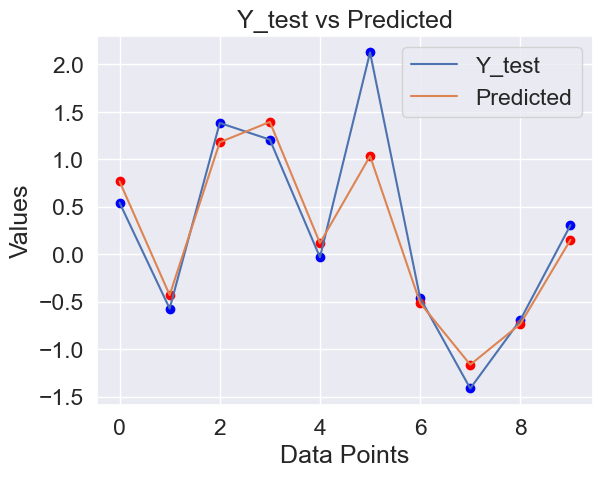

In [385]:
y_actual = y_test[:10]
y_predicted = predictions_RD[:10]
index = range(10)

plt.plot(index,y_actual, label='Y_test')
plt.scatter(index, y_actual, color='blue')
plt.plot(index,y_predicted, label='Predicted')
plt.scatter(range(len(y_predicted)), y_predicted, color='red')

plt.xlabel('Data Points')
plt.ylabel('Values')

plt.title('Y_test vs Predicted')
plt.legend()

plt.show()


In [386]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, r2_score
model =RandomForestRegressor(random_state=123)
scorer = make_scorer(r2_score)

r2_scores = cross_val_score(model, X_train, y_train, cv=5, scoring=scorer)

for i, score in enumerate(r2_scores):
    print(f"Fold {i+1}: {score}")
print("Average Score:", np.mean(r2_scores))



Fold 1: 0.8048889644912399
Fold 2: 0.8092758124700723
Fold 3: 0.8368851180843255
Fold 4: 0.8092628642229105
Fold 5: 0.8132187468156189
Average Score: 0.8147063012168335


In [387]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
kfold = KFold(n_splits=5)
kfold = kfold.split(X_train, y_train)
rmses = []

for k, (i_train, i_test) in enumerate(kfold):
    model_RD.fit(X_train.iloc[i_train, :], y_train.iloc[i_train])
    rmse = mean_squared_error( y_train.iloc[i_test],model_RD.predict(X_train.iloc[i_test, :]))**0.5
    rmses.append(rmse)
    print('Fold: {0} : rmse = {1}'.format(k,rmse))
 
print('\n\nCross-Validation:\n mean {0} \n std: {1}'.format(np.mean(rmses), np.std(rmses)))

Fold: 0 : rmse = 0.43871532299094135
Fold: 1 : rmse = 0.43773413006530515
Fold: 2 : rmse = 0.40517992422614957
Fold: 3 : rmse = 0.43028820248405536
Fold: 4 : rmse = 0.43562229017923565


Cross-Validation:
 mean 0.4295079739891374 
 std: 0.012508337568819316


### Tìm siêu tham số cho mô hình

Các siêu tham số của mô hình

- n_estimators: Số lượng cây quyết định
- max_depth: Độ sâu tối đa của các cây quyết định
- min_samples_split: Số lượng mẫu tối thiểu yêu cầu để phân chia một nút.
- min_samples_leaf: Số lượng mẫu tối thiểu yêu cầu để tạo ra một lá
- max_features: Số lượng đặc trưng tối đa được xem xét để tìm kiếm phân chia tốt nhất (sqrt, log2)


In [388]:

param_grid = {
    "n_estimators": [50,100,150],
    'max_depth': [5,10,50],
    'max_features': ['log2', 'sqrt'],
    'min_samples_leaf': [1, 2, 5,10],
    'min_samples_split': [1,2, 5, 10],
}


In [389]:
# from sklearn.model_selection import GridSearchCV

# grid_search = GridSearchCV(estimator=model_RD, param_grid=param_grid, cv=5)
# # Fit the grid search to the data
# grid_fit = grid_search.fit(X_train, y_train)
# best_parameters = grid_fit.best_params_
# best_parameters

In [390]:
model_RD1 = RandomForestRegressor(random_state=123, max_depth=50, max_features='sqrt', min_samples_leaf=2, min_samples_split=10)
model_RD1.fit(X_train, y_train)
predictions_RD1 = model_RD1.predict(X_test)

In [391]:
from sklearn.metrics import r2_score 
r2_score_RD1 = r2_score(y_test,predictions_RD1)
print(r2_score_RD1)

0.8266821130299937


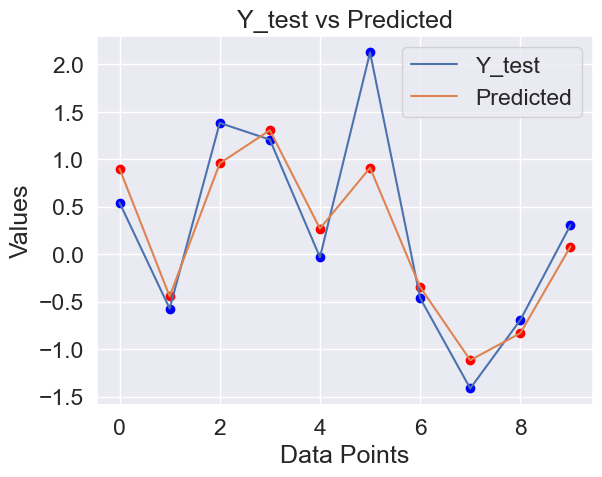

In [392]:
y_actual = y_test[:10]
y_predicted = predictions_RD1[:10]
index = range(10)

plt.plot(index,y_actual, label='Y_test')
plt.scatter(index, y_actual, color='blue')
plt.plot(index,y_predicted, label='Predicted')
plt.scatter(range(len(y_predicted)), y_predicted, color='red')

plt.xlabel('Data Points')
plt.ylabel('Values')

plt.title('Y_test vs Predicted')
plt.legend()

plt.show()


In [393]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, r2_score
model =RandomForestRegressor(random_state=123, max_depth=50, max_features='sqrt', min_samples_leaf=2, min_samples_split=10)
scorer = make_scorer(r2_score)

r2_scores = cross_val_score(model, X_train, y_train, cv=5, scoring=scorer)

for i, score in enumerate(r2_scores):
    print(f"Fold {i+1}: {score}")
print("Average Score:", np.mean(r2_scores))



Fold 1: 0.8028922757920194
Fold 2: 0.8106617877781852
Fold 3: 0.8354369914285824
Fold 4: 0.8080576057699806
Fold 5: 0.8135688719043618
Average Score: 0.814123506534626


In [394]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
kfold = KFold(n_splits=5)
kfold = kfold.split(X_train, y_train)
rmses = []
model =RandomForestRegressor(random_state=123, max_depth=50, max_features='sqrt', min_samples_leaf=2, min_samples_split=10)
for k, (i_train, i_test) in enumerate(kfold):
    model.fit(X_train.iloc[i_train, :], y_train.iloc[i_train])
    rmse = mean_squared_error( y_train.iloc[i_test],model.predict(X_train.iloc[i_test, :]))**0.5
    rmses.append(rmse)
    print('Fold: {0} : rmse = {1}'.format(k,rmse))
 
print('\n\nCross-Validation:\n mean {0} \n std: {1}'.format(np.mean(rmses), np.std(rmses)))

Fold: 0 : rmse = 0.44095442806610635
Fold: 1 : rmse = 0.4361407430005278
Fold: 2 : rmse = 0.40697453456926697
Fold: 3 : rmse = 0.4316455464645466
Fold: 4 : rmse = 0.43521380743812266


Cross-Validation:
 mean 0.43018581190771404 
 std: 0.01197997711182684


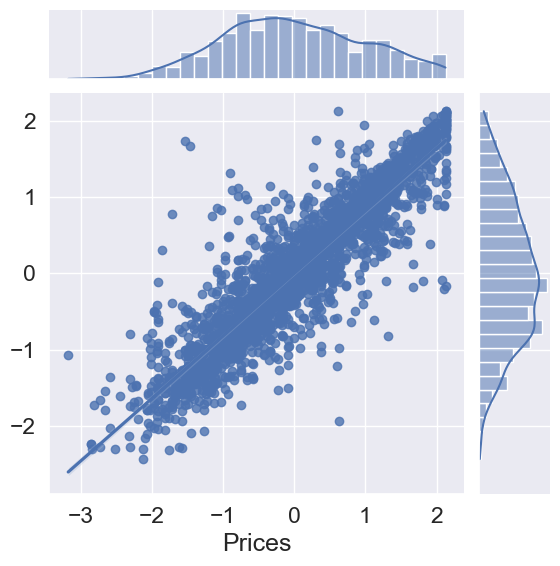

In [395]:
sns.jointplot(x=y_test,y=predictions_RD,kind='reg')

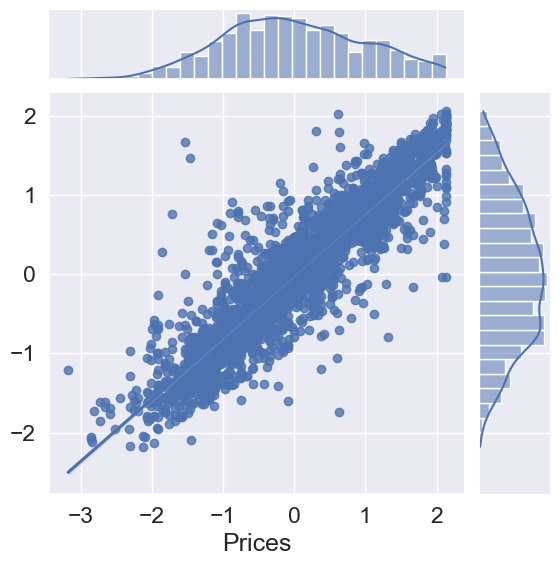

In [396]:
sns.jointplot(x=y_test,y=predictions_RD1,kind='reg')

# Decision Tree Regression (Đức)

In [397]:
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.metrics import mean_squared_error, r2_score

# # X_train, y_train: Tập dữ liệu huấn luyện
# model = DecisionTreeRegressor()
# model.fit(X_train, y_train)

# y_test_pred = model.predict(X_test)
# # Tính toán Mean Squared Error (MSE)
# mse = mean_squared_error(y_test, y_test_pred)
# print("Mean Squared Error on Test Set:", mse)

# # Tính toán R-squared (R2)
# r2 = r2_score(y_test, y_test_pred)
# print("R-squared on Test Set:", r2)

# Đánh giá 3 thuật theo các metrics (Đức)